In [2]:
import pandas as pd

In [3]:
raw_data = pd.read_excel('final_analysis_data.xlsx')
final_data = pd.read_excel('28-Night-FINAL_DATASET.xlsx')

In [4]:
final_data.columns

Index(['hhid', 'region', 'regurb', 'subreg', 'district', 'urban', 'weight',
       'PID', 's4q07', 'h2q3', 'age', 'h2q10', 's8q03', 's8q04', 's8q06',
       's8q08', 's8q10', 's8q12', 's8q19a', 'occ', 'h8q19b_twoDigit', 's8q20a',
       'h8q20b_oneDigit', 's8q36a', 's8q36b', 's8q36c', 's8q36d', 's8q36e',
       's8q69', 's8q77', 's8q31a', 's8q31c', 's8q78', 'CEA01', 'CEA01A',
       'CEA01B', 'CEA01C', 'CEA01D', 'education_levels', 'married',
       'total_hours', 'hourly_wage', 'monthly_wage', 'lw', 'permanent', 'age2',
       'numchild', 'gender', 'sec_cat', 'employed', 'lmw'],
      dtype='object')

In [5]:
final_employtics = final_data[['hhid', 'PID', 'h2q3', 'age', 'h2q10', 's8q04', 's8q06', 's8q08', 's8q10', 's8q12',
                               'education_levels', 'total_hours', 'hourly_wage', 'monthly_wage', 'numchild', 'gender','lw',
                               'sec_cat', 'h8q19b_twoDigit', 'lmw', 'weight']]
final_employtics = final_employtics.rename(columns={'h2q3': 'sex', 'h2q10': 'marital_status', 's8q04': 'waged_worker', 
                                                's8q06': 'business_owner', 's8q08': 'unpaid_hh_worker','s8q10': 'apprentice', 
                                                's8q12': 'hh_farm_worker','h8q19b_twoDigit': 'ISCO'})

In [6]:
def employ_status(row):
    if row['waged_worker'] ==1 or  row['business_owner'] == 1 or row['apprentice']==1 or row['unpaid_hh_worker']==1:
        return 1
    else:
        return 0

In [7]:
final_employtics['employed'] = final_employtics.apply(lambda row: employ_status(row), axis=1)
final_employtics.shape

(29034, 22)

In [22]:
weighted_hours = pd.read_excel('Weighted_hours.xlsx')
weighted_hours.head(3)

,hrs,proportion
0,0,0.1505
1,1,0.0044
2,2,0.0086


In [8]:
employed_pips = final_employtics[final_employtics['employed']== 1].copy()
employed_pips['unique_person_id'] = employed_pips['hhid'].astype(str) + '_' + employed_pips['PID'].astype(str)
employed_pips.shape

(5940, 23)

In [31]:
employed_pips_hrs_ = employed_pips.merge(weighted_hours, left_on='total_hours', right_on='hrs', how='outer')
employed_pips_hrs_.head(2)

,hhid,PID,sex,age,marital_status,waged_worker,business_owner,unpaid_hh_worker,apprentice,hh_farm_worker,...,gender,lw,sec_cat,ISCO,lmw,weight,employed,unique_person_id,hrs,proportion
0,0007d1f1449242feb5a25429644fb991,2.0,2.0,24.0,5.0,1.0,2.0,2.0,2.0,1.0,...,1.0,NaN,4.0,23.0,NaN,2621.863747,1,0007d1f1449242feb5a25429644fb991_2.0,5,0.0195
1,0007d1f1449242feb5a25429644fb991,2.0,2.0,24.0,5.0,1.0,2.0,2.0,2.0,1.0,...,1.0,NaN,4.0,23.0,NaN,2621.863747,1,0007d1f1449242feb5a25429644fb991_2.0,5,0.0195


In [46]:
ISCO_parting = employed_pips_hrs_[['unique_person_id', 'sex', 'sec_cat', 'hourly_wage', 'lw', 'proportion']].copy()
ISCO_parting =ISCO_parting[ISCO_parting['lw'].notna()]

In [47]:
ISCO_parting.head()

,unique_person_id,sex,sec_cat,hourly_wage,lw,proportion
14,2e52712b6bed4118b543e6d8488ee019_1.0,1.0,4.0,6000.000000,8.699514,0.0195
15,2e52712b6bed4118b543e6d8488ee019_1.0,1.0,4.0,6000.000000,8.699514,0.0195
86,0a33bbb4716e43918e2dcb131f616aff_1.0,1.0,1.0,2142.857178,7.669895,0.0173
87,0a33bbb4716e43918e2dcb131f616aff_1.0,1.0,1.0,2142.857178,7.669895,0.0173
90,0e0d592eae8546e29fa5672ad599d418_6.0,1.0,2.0,15000.000000,9.615806,0.0173


In [48]:
def weighted_average(dataframe, value, weight):
    val = dataframe[value]
    wt = dataframe[weight]
    return (val * wt).sum() / wt.sum()

In [54]:
sec_wage = ISCO_parting.groupby(['sec_cat', 'sex']).apply(weighted_average,
                                     'hourly_wage', 'proportion')

In [55]:
sec_wage = pd.DataFrame(sec_wage)
sec_wage = sec_wage.reset_index()

,sec_cat,sex,0
0,1.0,1.0,5128.096978
1,1.0,2.0,3690.604546
2,2.0,1.0,8112.984016
3,2.0,2.0,1809.954082
4,3.0,1.0,11156.835439
5,4.0,1.0,16486.273681
6,4.0,2.0,16562.179092
7,5.0,1.0,6277.229347
8,6.0,1.0,8727.401528


In [56]:
# hourly_gender = sec_gender.reset_index()
# hourly_gender = hourly_gender.rename(columns={1.0 : 'Men', 2.0: 'Women'})
# hourly_gender['gender_gap'] = (hourly_gender['Men'] - hourly_gender['Women'])*100
# hourly_gender

In [61]:
sample_={1: 'Agriculture', 2: 'Manufactiring', 3: 'Construction', 4:'Market services', 5:'Non-market services', 6: 'Mining and quarrying'}
sec_wage["sec_cat"] = sec_wage["sec_cat"].replace(sample_)

In [62]:
sex_ = {1: 'Male', 2: 'Female'}
sec_wage["sex"] = sec_wage["sex"].replace(sex_)

In [65]:
sec_wage = sec_wage.rename(columns={0: 'hourly_wage'}).drop(columns=['sec_wage'])
sec_wage.to_excel('sec.xlsx')

In [18]:
ISCO_ = ISCO.pivot(index='sec_cat', columns='sex', values='unique_person_id')
ISCO_

sex,1.0,2.0
sec_cat,,
Agriculture,1050,902
Construction,320,10
Manufactiring,288,166
Market services,1670,1322
Mining and quarrying,38,20
Non-market services,86,68


In [19]:
ISCO_ = ISCO_.reset_index()
ISCO_  = ISCO_.rename(columns={1.0 : 'Men', 2.0: 'Women'})

In [20]:
ISCO_

sex,sec_cat,Men,Women
0,Agriculture,1050,902
1,Construction,320,10
2,Manufactiring,288,166
3,Market services,1670,1322
4,Mining and quarrying,38,20
5,Non-market services,86,68


In [25]:
ISCO = ISCO.fillna(0)

In [27]:
ISCO['men_perc'] = ISCO['Men']/(ISCO['Men'] + ISCO['Women']) 
ISCO['women_perc'] = ISCO['Women']/(ISCO['Men'] + ISCO['Women']) 

In [40]:
ISCO['ISCO'].unique()

array([ 11.,  12.,  13.,  14.,  21.,  22.,  23.,  24.,  25.,  26.,  31.,
        32.,  33.,  34.,  35.,  41.,  42.,  43.,  44.,  51.,  52.,  53.,
        54.,  61.,  62.,  63.,  71.,  72.,  73.,  74.,  75.,  81.,  82.,
        83.,  91.,  92.,  93.,  94.,  95.,  96., 991., 992., 993.])

In [ ]:
{'Managers': [11,12,13,14]}

<AxesSubplot:ylabel='ISCO'>

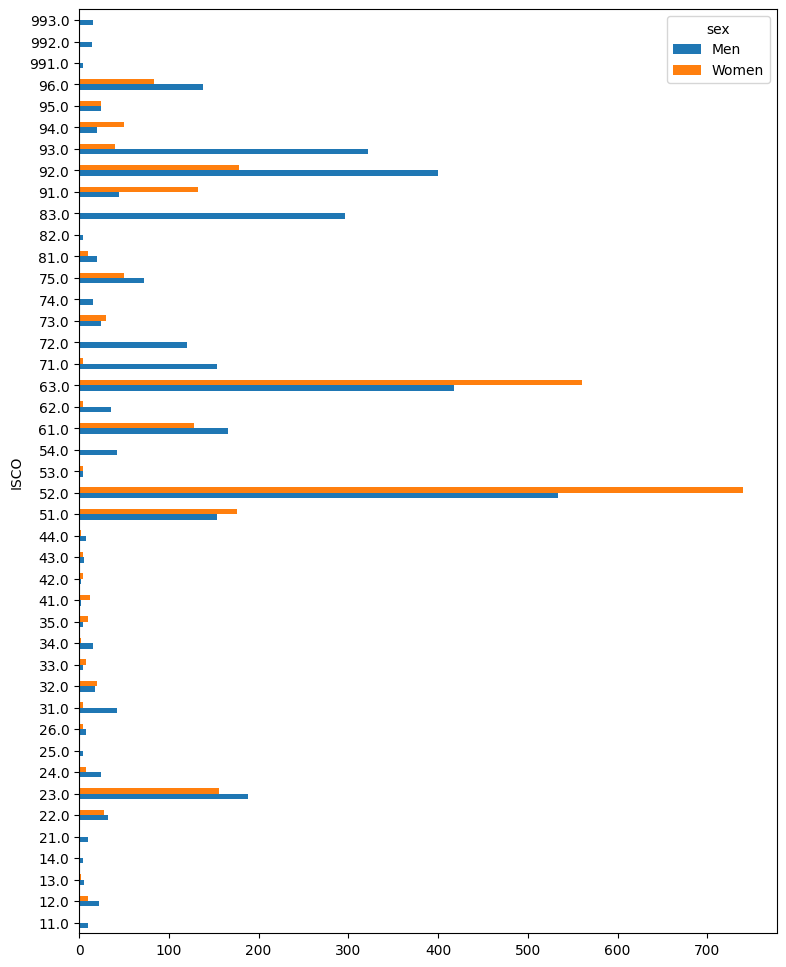

In [38]:
ISCO.plot.barh(x='ISCO', y=['Men', 'Women'],  figsize=(9, 12))